<a href="https://colab.research.google.com/github/cocoa-huang/24F_MATH156_Final_Project/blob/main/Math_156_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import shutil
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import seaborn as sns

from torchvision import transforms
from torch.utils.data import Dataset
import torchvision.models as models
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# Downloading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/Math156_final_project/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 597M/612M [00:04<00:00, 127MB/s]
100% 612M/612M [00:04<00:00, 131MB/s]


In [ ]:
# Define paths
zip_path = '/content/gtsrb-german-traffic-sign.zip'
extracted_path = '/content/gtsrb-dataset'

# Create directory for extraction
os.makedirs(extracted_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Extracted to: {extracted_path}")


Extracted to: /content/gtsrb-dataset


In [ ]:
if os.path.exists(os.path.join(extracted_path, "train")):
    shutil.rmtree(os.path.join(extracted_path, "train"))
if os.path.exists(os.path.join(extracted_path, "test")):
    shutil.rmtree(os.path.join(extracted_path, "test"))
if os.path.exists(os.path.join(extracted_path, "meta")):
    shutil.rmtree(os.path.join(extracted_path, "meta"))

# Exploring and visualizing data





In [ ]:
data_path = '/content/gtsrb-dataset'
train_data_path = os.path.join(data_path, 'Train')
valid_data_path = os.path.join(data_path, 'Test')

train_df = pd.read_csv("/content/gtsrb-dataset/Train.csv")
meta_df = pd.read_csv("/content/gtsrb-dataset/Meta.csv")
test_df = pd.read_csv("/content/gtsrb-dataset/Test.csv")

In [ ]:
train_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [ ]:
meta_df

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


In [ ]:
test_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


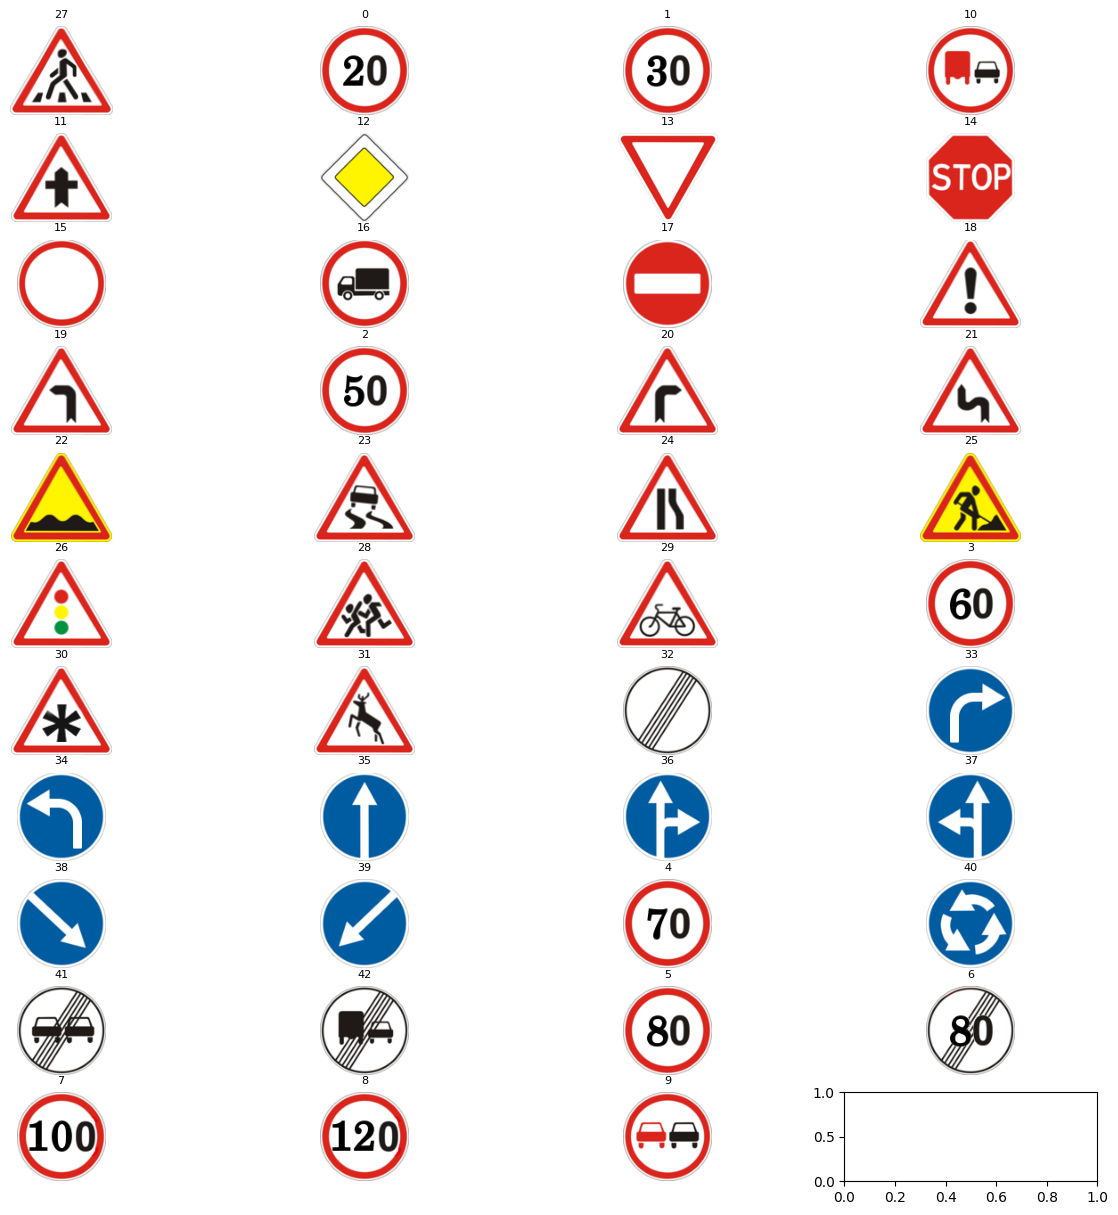

In [ ]:
# visualizing meta data

signs = [os.path.join(data_path, meta_df.Path.to_list()[i]) for i in range(43)]
labels = meta_df['ClassId'].to_list()
fig, axes = plt.subplots(11, 4, figsize=(15, 15))
for i, image_path in enumerate(signs):
    image = Image.open(image_path)
    row = i // 4
    col = i % 4
    axes[row, col].imshow(image)
    axes[row, col].axis('off')
    axes[row, col].set_title(labels[i], fontsize=8)
plt.show();

As we can see, there's a total of 43 classes (43 different traffic signs)

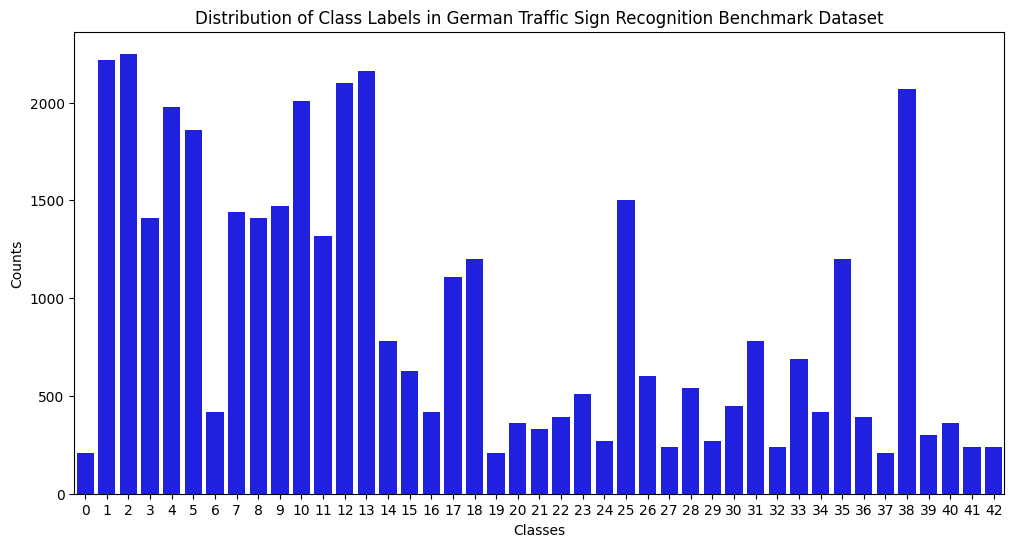

In [ ]:
classes = train_df["ClassId"].value_counts().head(43)
plt.figure(figsize=(12,6))
plt.title("Distribution of Class Labels in German Traffic Sign Recognition Benchmark Dataset")
plt.ylabel('Counts')
plt.xlabel('Classes')

sns.barplot(y=classes.values, x=classes.index,color='b');

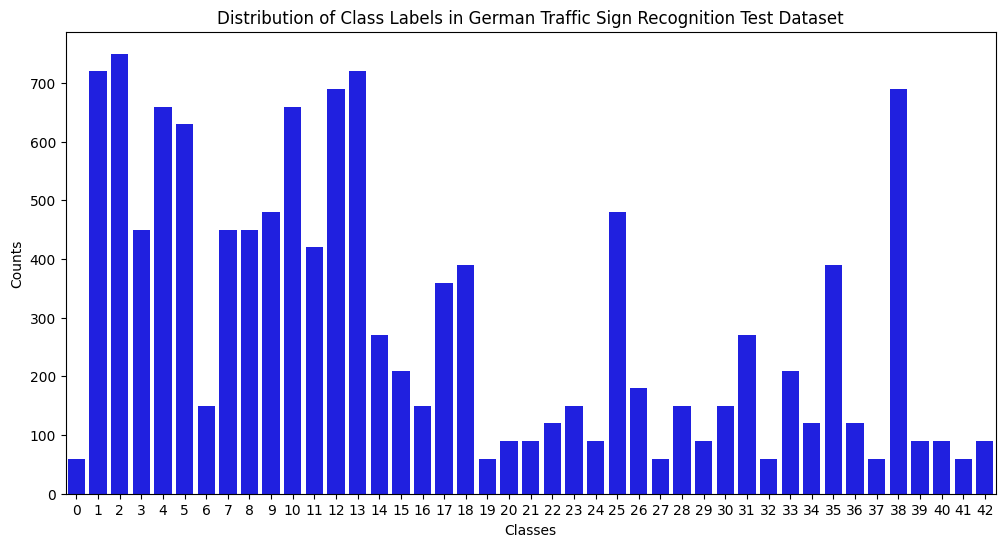

In [ ]:
classes = test_df["ClassId"].value_counts().head(43)
plt.figure(figsize=(12,6))
plt.title("Distribution of Class Labels in German Traffic Sign Recognition Test Dataset")
plt.ylabel('Counts')
plt.xlabel('Classes')

sns.barplot(y=classes.values, x=classes.index,color='b');

Class imbalanced but very similar distribution between train and test data

# Data preparation

In [ ]:
import torch
import torch.nn.functional as F

# Define the device to use for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print('Good to go!')
else:
    print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


In [ ]:
# code from https://gist.github.com/ihoromi4/b681a9088f348942b01711f251e5f964#file-seed_everything-py
# ensure reproducibility even with GPU usage
def seed_everything(seed: int):
    import os
    import random

    import numpy as np
    import torch
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True


seed_everything(0)

In [ ]:
class GTSRB(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Initialize the GTSRB dataset.

        Args:
            csv_file (str): Path to the CSV file (e.g., train.csv).
            root_dir (str): Root directory containing the images.
            transform (callable, optional): Transformations to apply to the images.
        """
        self.df = pd.read_csv(csv_file)  # Load the CSV file
        self.root_dir = root_dir  # Root directory containing images
        self.transform = transform


    def __len__(self):
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        return len(self.df)

    def __getitem__(self, idx):
        """
        Retrieve an image and its label by index.

        Args:
            idx (int): Index of the sample.

        Returns:
            tuple: (image, label) where image is the transformed image tensor and label is the class ID.
        """
        # Get the image path and label
        img_path = os.path.join(self.root_dir, self.df.iloc[idx]['Path'])
        label = torch.tensor(self.df.iloc[idx]['ClassId'])

        # Load and preprocess the image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
image_net_mean = torch.Tensor([0.485, 0.456, 0.406])
image_net_std = torch.Tensor([0.229, 0.224, 0.225])
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=image_net_mean, std=image_net_std)
])

In [ ]:
# Paths to the CSV files and image root directory
train_csv = '/content/gtsrb-dataset/Train.csv'
test_csv = '/content/gtsrb-dataset/Test.csv'
data_path = '/content/gtsrb-dataset'  # Root directory for images

In [ ]:
training_set = GTSRB(train_csv,data_path,transform=data_transform)
# Define the sizes of the splits
train_size = int(0.8 * len(training_set))
val_size = len(training_set) - train_size
# Split the dataset
training_set, validation_set = random_split(training_set, [train_size, val_size])

In [ ]:
# load data
train_loader = DataLoader(dataset=training_set, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=validation_set, batch_size=32, shuffle=False)

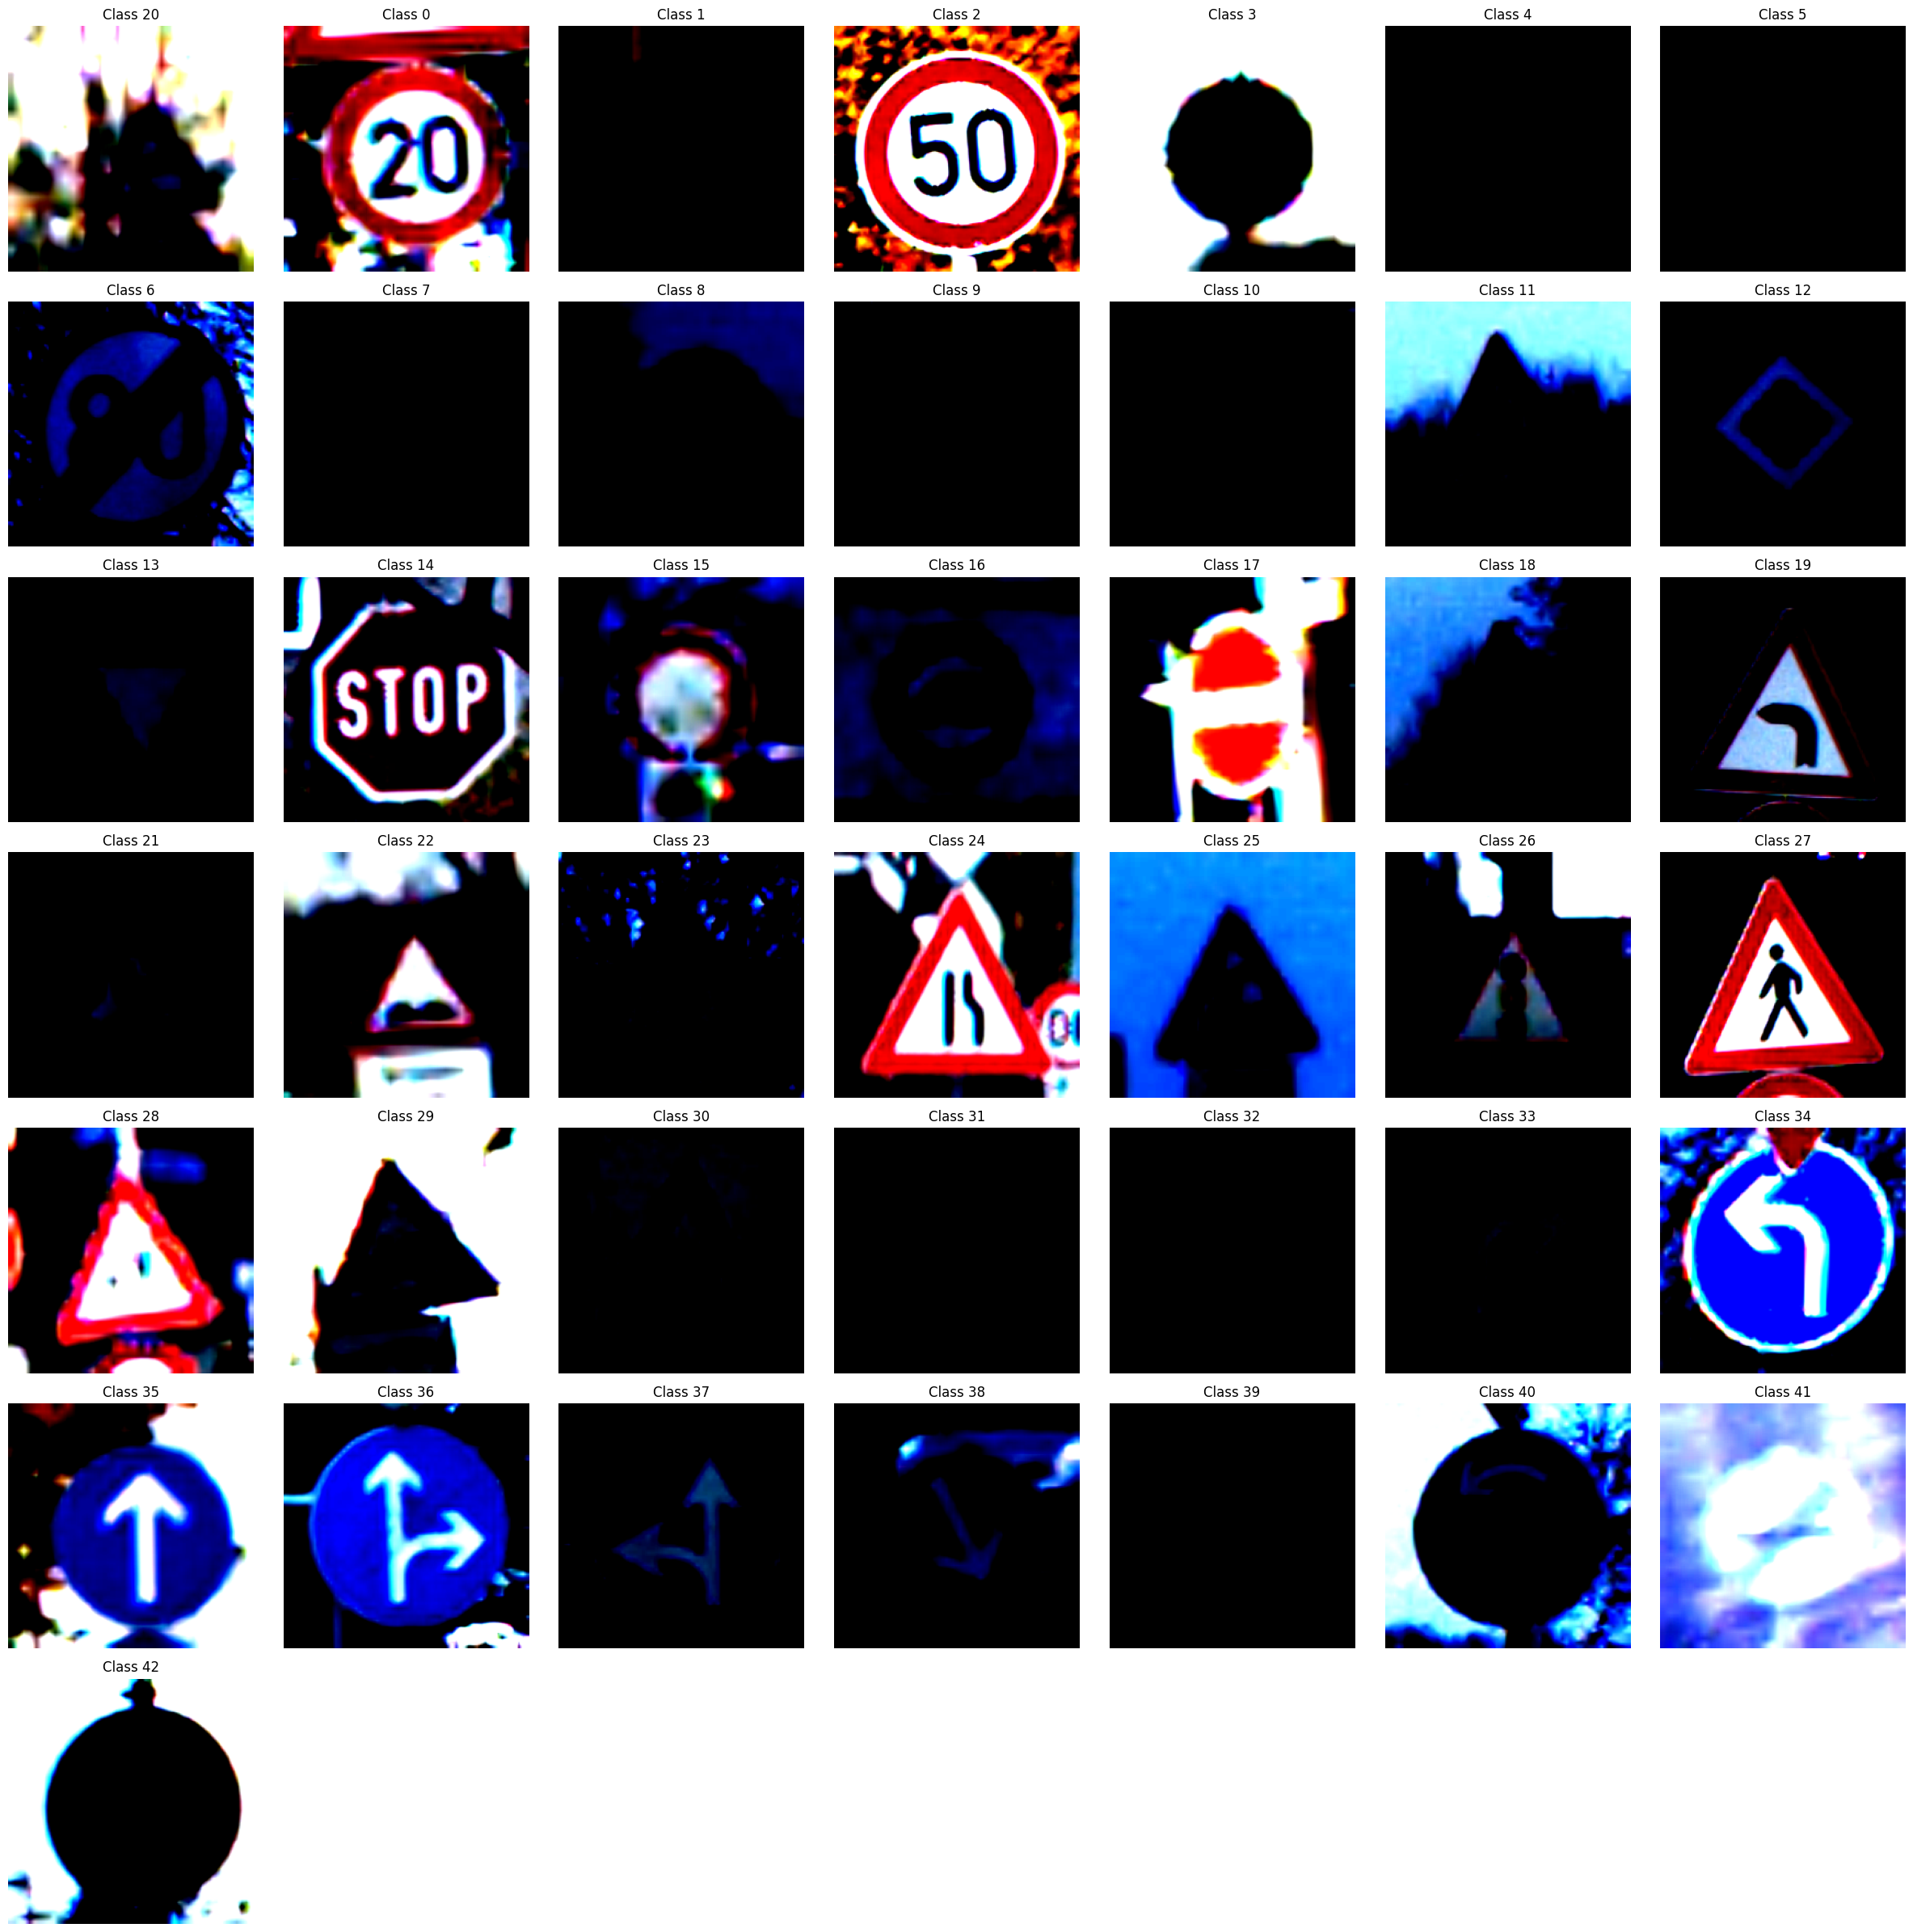

In [ ]:
# choosing one image(traffic) corresponding to each label to visualize
def display_one_image_per_label(dataset, label_column='ClassId', label_dict=None, rows=7, cols=7):
    """
    Displays one random image for each unique label in the dataset.

    Args:
        dataset: GTSRB dataset instance.
        label_column (str): Column name in the DataFrame corresponding to labels.
        label_dict (dict, optional): Optional mapping of label indices to class names.
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
    """
    # Get all unique labels
    unique_labels = dataset.df[label_column].unique()
    num_classes = len(unique_labels)

    # Randomly sample one image per class
    sampled_images = []
    for label in unique_labels:
        label_indices = dataset.df[dataset.df[label_column] == label].index
        random_index = random.choice(label_indices)
        img, _ = dataset[random_index]
        sampled_images.append((img, label))

    # Set up grid for plotting
    figure = plt.figure(figsize=(24, 24))
    for i in range(min(rows * cols, num_classes)):
        img, label = sampled_images[i]
        # Optional: Get label name from label_dict
        label_name = label_dict[label] if label_dict else f"Class {label}"


        # Add subplot
        ax = figure.add_subplot(rows, cols, i + 1)
        ax.set_title(label_name, fontsize=12)
        ax.axis("off")
        plt.imshow(img.permute(1, 2, 0))

    plt.tight_layout()
    plt.show()

# Example usage
display_one_image_per_label(training_set, label_dict=None, rows=7, cols=7)


The reason why a lot of these images are dark/blurry is because how `.imshow()` behave and we normalized the images at `data_transform`

In [ ]:
def train(model, train_loader, val_loader, optimizer, criterion, device,
          num_epochs):
    """
    Train the model on the training set and evaluate it on the validation set every epoch.

    Args:
        model: model to train.
        train_loader (torch.utils.data.DataLoader): Data loader for the training set.
        val_loader (torch.utils.data.DataLoader): Data loader for the validation set.
        optimizer (torch.optim.Optimizer): Optimizer to use for training.
        criterion (callable): Loss function to use for training.
        device (torch.device): Device to use for training.
        num_epochs (int): Number of epochs to train the model.
    """
    # Place model on device
    model = model.to(device)

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        # Use tqdm to display a progress bar during training
        with tqdm(total=len(train_loader),
                  desc=f'Epoch {epoch + 1}/{num_epochs}',
                  position=0,
                  leave=True) as pbar:
            for inputs, labels in train_loader:
                # Move inputs and labels to device
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero out gradients
                optimizer.zero_grad()

                # Compute the logits and loss
                logits = model(inputs)
                loss = criterion(logits, labels)

                # Backpropagate the loss
                loss.backward()

                # Update the weights
                optimizer.step()

                # Update the progress bar
                pbar.update(1)
                pbar.set_postfix(loss=loss.item())

        # Evaluate the model on the validation set
        avg_loss, accuracy = evaluate(model, val_loader, criterion, device)
        print(
            f'Validation set: Average loss = {avg_loss:.4f}, Accuracy = {accuracy:.4f}'
        )


def evaluate(model, test_loader, criterion, device):
    """
    Evaluate the model on the test set.

    Args:
        model: model to evaluate.
        test_loader (torch.utils.data.DataLoader): Data loader for the test set.
        criterion (callable): Loss function to use for evaluation.
        device (torch.device): Device to use for evaluation.

    Returns:
        float: Average loss on the test set.
        float: Accuracy on the test set.
    """
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():
        total_loss = 0.0
        num_correct = 0
        num_samples = 0

        for inputs, labels in test_loader:
            # Move inputs and labels to device
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Compute the logits and loss
            logits = model(inputs)
            loss = criterion(logits, labels)
            total_loss += loss.item()

            # Compute the accuracy
            _, predictions = torch.max(logits, dim=1)
            num_correct += (predictions == labels).sum().item()
            num_samples += len(inputs)

    # Compute the average loss and accuracy
    avg_loss = total_loss / len(test_loader)
    accuracy = num_correct / num_samples

    return avg_loss, accuracy

# Resnet from scratch and training

In [ ]:
class ResidualBlock(nn.Module):

    def __init__(self, in_channels, out_channels, downsample=False):
        '''
        Initialize a basic residual block.
        Depending on whether downsample is True, there are two types of basic blocks in Resnet 18,
        one to downsample the input and the other maintains the same size.
        You can use Pytorch's functions.

        Input and output shapes of each layer:
        1) conv1 (3*3 kernel, no bias): (batch_size, in_channels, H, W) -> (batch_size, out_channels, H, W) if downsample=False
           conv1 (3*3 kernel, no bias): (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) if downsample=True, with stride of 2
        2) conv2 (3*3 kernel, no bias): (batch_size, out_channels, H, W) -> (batch_size, out_channels, H, W)
        3) conv3 (optional) if downsample=True (1*1 kernel, no bias): (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) with stride of 2
        '''
        super(ResidualBlock, self).__init__()
        self.downsample = downsample
        stride = 2 if downsample else 1
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=2, bias=False) if downsample else None
        self.bn3 = nn.BatchNorm2d(out_channels) if downsample else None

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        """
        Forward pass of the basic residual block.
        The input tensor 'x' should pass through the following layers:
        1) conv1: (batch_size, in_channels, H, W) -> (batch_size, out_channels, H, W)
           conv1: (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) if downsample=True
        2) Apply batch normalization after conv1.
        3) Apply relu activation.
        4) conv2: (batch_size, out_channels, H, W) -> (batch_size, out_channels, H, W)
        5) Apply batch normalization after conv2.
        6) (Optional) if downsample=True, conv3: (batch_size, in_channels, H, W) -> (batch_size, out_channels, H//2, W//2) on the original input
        7) (Optional) if downsample=True, apply batch normalization after conv3.
        8) Add the residual value to the original input
        9) Apply relu activation in the end.
        """
        original = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
          original = self.conv3(original)
          original = self.bn3(original)

        out += original
        out = self.relu(out)

        return out

In [ ]:
class ResNet18(nn.Module):
    """
    Implementation of the ResNet-18 architecture for image classification.

    Args:
        num_classes (int): Number of output classes for the classification task.

    Input:
        x (torch.Tensor): Input tensor of shape (batch_size, 3, H, W),
                          where H and W are the height and width of the image (typically 224x224).

    Output:
        torch.Tensor: Logits tensor of shape (batch_size, num_classes).

    Returns:
        torch.Tensor: A tensor containing the predicted class scores for each input image.
    """

    def __init__(self, num_classes=100):
        super(ResNet18, self).__init__()
        self.in_channels = 64
        # Initial convolution
        self.conv1 = nn.Conv2d(3,
                               64,
                               kernel_size=7,
                               stride=2,
                               padding=3,
                               bias=False)
        # Output shape: (batch_size, 64, H/2, W/2) if input is (batch_size, 3, H, W)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # Output shape: (batch_size, 64, H/4, W/4)

        self.layer1 = nn.Sequential(
            ResidualBlock(64, 64, downsample=False),
            ResidualBlock(64, 64, downsample=False)
        )
        # Layer1: 64 -> 64

        self.layer2 = nn.Sequential(
            ResidualBlock(64, 128, downsample=True),
            ResidualBlock(128, 128, downsample=False)
        )
        # Layer2: 64 -> 128

        self.layer3 = nn.Sequential(
            ResidualBlock(128, 256, downsample=True),
            ResidualBlock(256, 256, downsample=False)
        )
        # Layer3: 128 -> 256

        self.layer4 = nn.Sequential(
            ResidualBlock(256, 512, downsample=True),
            ResidualBlock(512, 512, downsample=False)
        )
        # Layer4 :256 -> 512

        # Average Pooling
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        # Fully connected layer
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        # ResNet18 structure
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [ ]:
seed_everything(0)

model = ResNet18(num_classes=43)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = nn.CrossEntropyLoss()

# Train the model
train(model,
      train_loader,
      val_loader,
      optimizer,
      criterion,
      device = 'cuda',
      num_epochs=5)

Epoch 1/5: 100%|██████████| 981/981 [02:29<00:00,  6.57it/s, loss=0.0917]


Validation set: Average loss = 0.2856, Accuracy = 0.9155


Epoch 2/5: 100%|██████████| 981/981 [02:26<00:00,  6.68it/s, loss=0.0158]


Validation set: Average loss = 0.0283, Accuracy = 0.9934


Epoch 3/5: 100%|██████████| 981/981 [02:27<00:00,  6.67it/s, loss=0.0557]


Validation set: Average loss = 0.0297, Accuracy = 0.9931


Epoch 4/5: 100%|██████████| 981/981 [02:27<00:00,  6.66it/s, loss=0.00511]


Validation set: Average loss = 0.0058, Accuracy = 0.9991


Epoch 5/5: 100%|██████████| 981/981 [02:28<00:00,  6.62it/s, loss=0.000576]


Validation set: Average loss = 0.0049, Accuracy = 0.9991


In [ ]:
save_dir = "/content/drive/MyDrive/Math156_final_project"

# Save the model for inference
model_path = f"{save_dir}/resnet18_inference.pth"
torch.save(model.state_dict(), model_path)

print(f"Model saved at: {model_path}")

Model saved at: /content/drive/MyDrive/Math156_final_project/resnet18_inference.pth


In [ ]:
save_dir = "/content/drive/MyDrive/Math156_final_project"
# Load the model for inference
model = ResNet18(num_classes=43)
model.load_state_dict(torch.load(f"{save_dir}/resnet18_inference.pth", map_location = torch.device('cpu')))
model.eval()

<ipython-input-17-d0ae0d4cd0f9>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{save_dir}/resnet18_inference.pth", map_location = torch.

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 6

# Preparing for test result

In [ ]:
class GTSRB(Dataset):
    def __init__(self, csv_file, root_dir, transform=None, split="train"):
        """
        Initialize the GTSRB dataset for testing.

        Args:
            csv_file (str): Path to the CSV file (e.g., train.csv, test.csv).
            root_dir (str): Root directory containing the images.
            transform (callable, optional): Transformations to apply to the images.
            split (str): Dataset split to use ('train', 'val', 'test').
        """
        self.df = pd.read_csv(csv_file)  # Load the CSV file
        self.root_dir = root_dir  # Root directory containing images
        self.transform = transform
        self.split = split

        # Ensure the split is valid
        assert self.split in ["train", "val", "test"], "Invalid split type."

    def __len__(self):
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        return len(self.df)

    def __getitem__(self, idx):
        """
        Retrieve an image and its label (for train/val) or ID (for test) by index.

        Args:
            idx (int): Index of the sample.

        Returns:
            tuple:
                - (image, label) for train/val splits.
                - (image, numeric_id) for the test split.
        """
        # Get the image path
        img_path = os.path.join(self.root_dir, self.df.iloc[idx]['Path'])

        # Load and preprocess the image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        if self.split == "test":
            # For the test set, return the image and its numeric_id
            numeric_id = os.path.basename(img_path)  # Extract the filename (e.g., 00001.png)
            return image, numeric_id
        else:
            # For train/val, return the image and label
            label = torch.tensor(self.df.iloc[idx]['ClassId'])
            return image, label



In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = GTSRB(test_csv,
                     data_path,
                     transform=test_transform,
                     split = 'test')

test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


In [ ]:
def generate_test_results(model, test_loader, output_csv_path, device='cpu'):
    """
    Generate a CSV file containing the test set predictions.

    Args:
        model (torch.nn.Module): Trained model.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
        output_csv_path (str): Path to save the CSV file.
        device (str): Device to run the inference ('cpu' or 'cuda').
    """
    model.to(device)
    model.eval()  # Set the model to evaluation mode

    results = []  # To store the results (numeric_id, predicted_class)

    with torch.no_grad():  # Disable gradient computation for inference
        for images, numeric_ids in tqdm(test_loader, desc="Generating Test Results"):
            images = images.to(device)  # Move images to the device
            logits = model(images)  # Get the model's predictions
            _, predictions = torch.max(logits, dim=1)  # Get the class with the highest probability

            # Store predictions and numeric_ids
            for numeric_id, pred in zip(numeric_ids, predictions.cpu().numpy()):
                results.append([numeric_id, pred])

    # Save results to a CSV file
    with open(output_csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Id", "Prediction"])  # Header
        writer.writerows(results)

    print(f"Test results saved to {output_csv_path}")

In [ ]:
# Generate the test results CSV
output_csv_path = '/content/test_results.csv'
generate_test_results(model, test_loader, output_csv_path, device='cpu')


Generating Test Results: 100%|██████████| 395/395 [05:14<00:00,  1.26it/s]

Test results saved to /content/test_results.csv


In [ ]:
test_results = pd.read_csv("/content/test_results.csv")

In [ ]:
# Preprocess the Path column in test_df to match the Id column in predictions_df
test_df['Id'] = test_df['Path'].apply(lambda x: x.replace("Test/", ""))

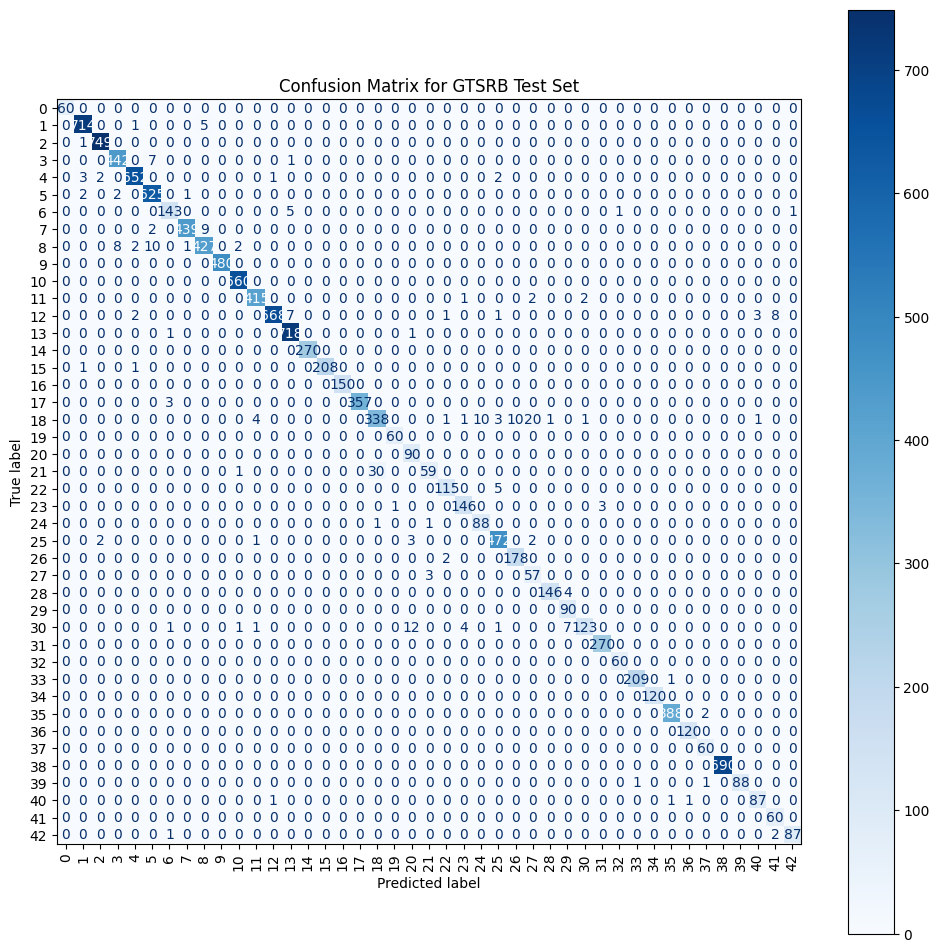

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_df["Path"] = test_df["Path"].str.replace("Test/", "")  # Remove "Test/" if exists for matching
test_results["Id"] = test_results["Id"].astype(str)  # Ensure Id is string for comparison

# Merge on Path and Id to align predictions with ground truth
merged_df = test_df.merge(test_results, left_on="Path", right_on="Id")

# Extract ground truth and predictions
y_true = merged_df["ClassId"]
y_pred = merged_df["Prediction"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_true.unique()))
disp.plot(ax=ax, cmap="Blues", xticks_rotation="vertical")
plt.title("Confusion Matrix for GTSRB Test Set")
plt.show()

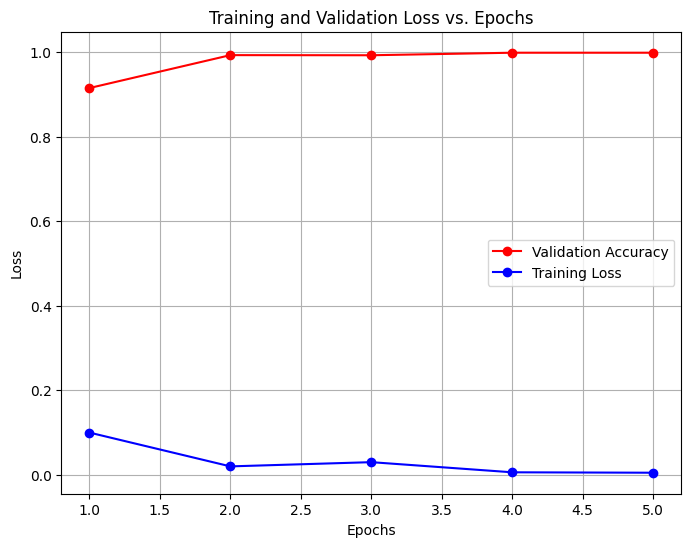

In [ ]:
# Extracted validation accuracies from the log
# all loss data is according the output of the training process
validation_accuracies = [0.9155, 0.9934, 0.9931, 0.9991, 0.9991]
epochs = range(1, len(validation_accuracies) + 1)

training_losses = [0.1000, 0.0200, 0.0300, 0.0060, 0.0050]

#plotting training loss and validation accuracy against epoch
plt.figure(figsize=(8, 6))
plt.plot(epochs, validation_accuracies, marker='o', label='Validation Accuracy', color='red')
plt.plot(epochs, training_losses, marker='o', label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.grid()
plt.legend()
plt.show()

## Accuracy on test result

In [ ]:
# Merge the test_df with predictions_df on 'Id'
merged_df = test_df.merge(test_results, on='Id', how='inner')

# Calculate accuracy
correct_predictions = (merged_df['ClassId'] == merged_df['Prediction']).sum()
total_predictions = len(merged_df)
accuracy = correct_predictions / total_predictions

print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9800475059382423


### Precision for each class

In [ ]:
from sklearn.metrics import precision_score

# Ground truth and predictions
y_true = merged_df['ClassId']
y_pred = merged_df['Prediction']

# Calculate precision for each class
precision_per_class = precision_score(y_true, y_pred, average=None)

# Overall precision (macro-average)
overall_precision = precision_score(y_true, y_pred, average='macro')

# Display the results
print("Precision for each class:")
for class_id, precision in enumerate(precision_per_class):
    print(f"Class {class_id}: {precision:.4f}")

print(f"\nOverall Precision (Macro Average): {overall_precision:.4f}")

Precision for each class:
Class 0: 1.0000
Class 1: 0.9903
Class 2: 0.9947
Class 3: 0.9779
Class 4: 0.9909
Class 5: 0.9705
Class 6: 0.9597
Class 7: 0.9955
Class 8: 0.9683
Class 9: 1.0000
Class 10: 0.9940
Class 11: 0.9857
Class 12: 0.9970
Class 13: 0.9822
Class 14: 1.0000
Class 15: 1.0000
Class 16: 1.0000
Class 17: 1.0000
Class 18: 0.9160
Class 19: 0.9836
Class 20: 0.8491
Class 21: 0.9365
Class 22: 0.9664
Class 23: 0.9605
Class 24: 0.8980
Class 25: 0.9752
Class 26: 0.9468
Class 27: 0.7037
Class 28: 0.9932
Class 29: 0.8911
Class 30: 0.9762
Class 31: 0.9890
Class 32: 0.9836
Class 33: 0.9952
Class 34: 1.0000
Class 35: 0.9949
Class 36: 0.9917
Class 37: 0.9524
Class 38: 1.0000
Class 39: 1.0000
Class 40: 0.9560
Class 41: 0.8571
Class 42: 0.9886

Overall Precision (Macro Average): 0.9654


## Weighted F1-score

In [ ]:
from sklearn.metrics import f1_score

ground_truth = test_df["ClassId"].values
predicted_labels = test_results["Prediction"].values  # Replace with your predictions
# Calculate macro-averaged F1 score
# Calculate weighted F1 score
weighted_f1 = f1_score(ground_truth, predicted_labels, average="weighted")

print(f"Weighted F1 Score: {weighted_f1:.4f}")

Weighted F1 Score: 0.9799


In [ ]:
# Calculate F1 scores for each class
f1_scores_per_class = f1_score(ground_truth, predicted_labels, average=None)

# Get class labels
classes = sorted(set(ground_truth))  # Sorted unique class IDs

# Display the F1 scores for each class
for cls, f1 in zip(classes, f1_scores_per_class):
    print(f"Class {cls}: F1 Score = {f1:.4f}")

Class 0: F1 Score = 1.0000
Class 1: F1 Score = 0.9910
Class 2: F1 Score = 0.9967
Class 3: F1 Score = 0.9800
Class 4: F1 Score = 0.9894
Class 5: F1 Score = 0.9812
Class 6: F1 Score = 0.9565
Class 7: F1 Score = 0.9854
Class 8: F1 Score = 0.9585
Class 9: F1 Score = 1.0000
Class 10: F1 Score = 0.9970
Class 11: F1 Score = 0.9869
Class 12: F1 Score = 0.9824
Class 13: F1 Score = 0.9897
Class 14: F1 Score = 1.0000
Class 15: F1 Score = 0.9952
Class 16: F1 Score = 1.0000
Class 17: F1 Score = 0.9958
Class 18: F1 Score = 0.8906
Class 19: F1 Score = 0.9917
Class 20: F1 Score = 0.9184
Class 21: F1 Score = 0.7712
Class 22: F1 Score = 0.9623
Class 23: F1 Score = 0.9669
Class 24: F1 Score = 0.9362
Class 25: F1 Score = 0.9793
Class 26: F1 Score = 0.9674
Class 27: F1 Score = 0.8085
Class 28: F1 Score = 0.9832
Class 29: F1 Score = 0.9424
Class 30: F1 Score = 0.8913
Class 31: F1 Score = 0.9945
Class 32: F1 Score = 0.9917
Class 33: F1 Score = 0.9952
Class 34: F1 Score = 1.0000
Class 35: F1 Score = 0.9949
Cl